In [160]:
import random
import pickle

import numpy as np
import matplotlib.pyplot as plt

# from outlier_cleaner import outlierCleaner

In [173]:
ages = pickle.load(open("practice_outliers_ages.pkl", "r"))
net_worths = pickle.load(open("practice_outliers_net_worths.pkl", "r"))

In [174]:
len(net_worths)

100

In [175]:
ages = np.reshape(ages, (len(ages), 1) )

In [176]:
net_worths = np.reshape(net_worths, (len(net_worths), 1) )

In [177]:
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

In [178]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
reg.coef_

array([[ 5.07793064]])

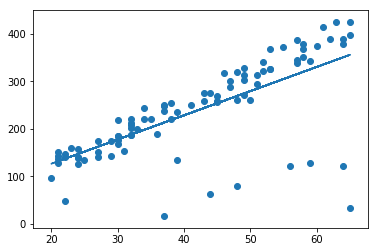

In [180]:
plt.plot(ages_train, reg.predict(ages_train))
plt.scatter(ages_train, net_worths_train)
plt.show()

In [181]:
reg.score(ages_test, net_worths_test)

0.87826247036646732

In [182]:
predictions = reg.predict(ages_train)

In [183]:
def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    cleaned_data = []

    ### your code goes here

    errors = np.abs(predictions - net_worths)

    idx = errors[:, 0] < np.percentile(errors, 90)

    cleaned_data = [ages[idx], net_worths[idx], errors[idx]]

    return cleaned_data

In [184]:
ages_filter, net_worths_filter, errors_filter = outlierCleaner(predictions, ages_train, net_worths_train)

In [185]:
reg.fit(ages_filter, net_worths_filter)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [186]:
reg.coef_

array([[ 6.36859481]])

In [187]:
reg.score(ages_test, net_worths_test)

0.98318945539553204

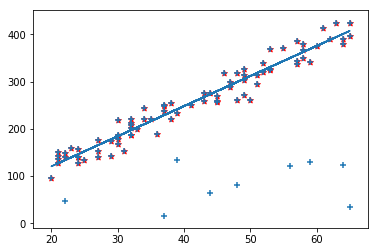

In [206]:
plt.plot(ages_filter, reg.predict(ages_filter))
plt.scatter(ages_filter, net_worths_filter, color='r', marker='*')
plt.scatter(ages_train, net_worths_train, marker='+')
plt.show()

In [229]:
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )

data_dict.pop('TOTAL', False)

features = ["salary", "bonus"]
data = featureFormat(data_dict, features)
data.shape

(94, 2)

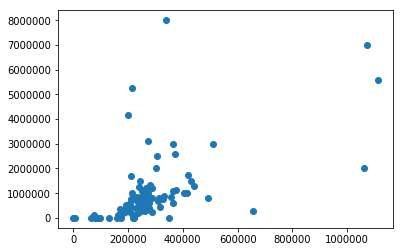

In [230]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

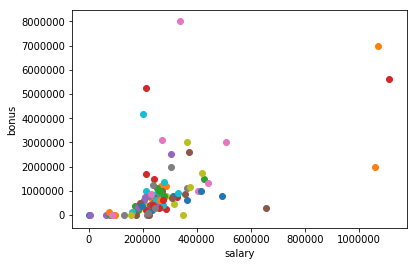

In [236]:
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )
#     print salary, bonus  # 26704229.0 97343619.0
    
    
matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [237]:
max_salary = 0
for k, v in data_dict.iteritems():
    salary = v['salary']
    if salary != 'NaN' and salary > max_salary:
        print k, salary, v['bonus'], max_salary
        max_salary = salary
        name = k

METTS MARK 365788 600000 0
MCMAHON JEFFREY 370448 2600000 365788
SHERRIFF JOHN R 428780 1500000 370448
WHALLEY LAWRENCE G 510364 3000000 428780
LAY KENNETH L 1072321 7000000 510364
SKILLING JEFFREY K 1111258 5600000 1072321


In [233]:
data_dict

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'